In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2019.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                   text
0     pendeteksi gangguan jaringan lokal metode cert...
1     eksistensi penggunaan wi fi warung kopi kota b...
2     pengaruh internet financial reporting tingkat ...
3     security function analysis performance high sp...
4     implementation top down approach method redesi...
5     optimization wireless network performance hier...
6     analysis qos vlan djikstra s algorithm open sh...
7     link performance improvement sananibun bts wit...
8     legal protection efforts patent holders indonesia
9     use e learning by teachers teaching learning p...
10    definition patent rights examples case studies...
11    analysis implementation backup line network br...
12    classification principles legal basis intellec...
13    attendance system automatic door locks laborat...
14         registration requirements application rights
15    patentability block chain technology future in...
16    influence speed user mobility qos wireless

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

6932
[['pendeteksi', 'gangguan', 'jaringan', 'lokal', 'metode', 'certainty', 'factor']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['pendeteksi', 'gangguan', 'jaringan', 'lokal', 'metode', 'certainty', 'factor', 'jaringan_lokal', 'metode_certainty', 'jaringan_lokal', 'jaringan_lokal', 'metode_certainty'], ['eksistensi', 'penggunaan', 'wi', 'fi', 'warung', 'kopi', 'kota', 'banda', 'aceh', 'banda_aceh', 'banda_aceh', 'banda_aceh'], ['pengaruh', 'internet', 'financial', 'reporting', 'tingkat', 'pengungkapan', 'informasi', 'website', 'frekuensi', 'perdagangan', 'saham', 'perusahaan', 'pertambangan'], ['security', 'function', 'analysis', 'performance', 'high', 'speed', 'router', 'networking'], ['implementation', 'top', 'down', 'approach', 'method', 'redesign', 'lan', 'harvani', 'hotel', 'palembang'], ['optimization', 'wireless', 'network', 'performance', 'hierarchical', 'token', 'bucket', 'case', 'muhammadiyah', 'university', 'palembang'], ['analysis', 'qos', 'vlan', 'djikstra', 's', 'algorithm', 'open', 'shortest', 'path', 'first', 'ospf'], ['link', 'performance', 'improvement', 'sananibun', 'bts', 'with', 'link', 's

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                                            0               1   \
0                                   pendeteksi        gangguan   
1                                   eksistensi      penggunaan   
2                                     pengaruh        internet   
3                                     security        function   
4                               implementation             top   
5                                 optimization        wireless   
6                                     analysis             qos   
7                                         link     performance   
8                                        legal      protection   
9                                          use               e   
10                                  definition          patent   
11                                    analysis  implementation   
12                              classification      principles   
13                                  attendance          system   
14        

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(10557 unique tokens: ['certainty', 'factor', 'gangguan', 'jaringan', 'jaringan_lokal']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow];
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

6932


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

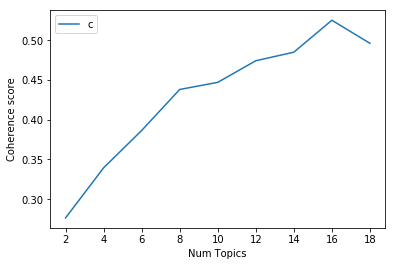

In [24]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.2764095606
Num Topics = 4  has Coherence Value of 0.3393898509
Num Topics = 6  has Coherence Value of 0.3863628141
Num Topics = 8  has Coherence Value of 0.4379782371
Num Topics = 10  has Coherence Value of 0.446927504
Num Topics = 12  has Coherence Value of 0.4741074394
Num Topics = 14  has Coherence Value of 0.4848696708
Num Topics = 16  has Coherence Value of 0.5250541333
Num Topics = 18  has Coherence Value of 0.4960539742


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)
pprint(model.print_topics())

[(0,
  '0.009*"sistem_informasi" + 0.009*"studi_kasus" + 0.007*"gaya_kepemimpinan" '
  '+ 0.006*"sistem_monitoring" + 0.006*"penyewaan" + 0.005*"rumah_tangga" + '
  '0.005*"linear" + 0.005*"fuzzy_tsukamoto" + 0.005*"radio_frequency" + '
  '0.005*"monitoring"'),
 (1,
  '0.011*"berorientasi" + 0.008*"sistem_informasi" + '
  '0.008*"keputusan_pembelian" + 0.007*"metode_ahp" + 0.007*"android" + '
  '0.007*"persamaan_linear" + 0.006*"game_edukasi" + 0.005*"aplikasi" + '
  '0.005*"pengembangan_bahan" + 0.005*"rapid_application"'),
 (2,
  '0.014*"studi_kasus" + 0.011*"web_service" + 0.008*"sistem_informasi" + '
  '0.006*"rancang_bangun" + 0.005*"aplikasi" + 0.005*"persediaan_obat" + '
  '0.005*"desa" + 0.005*"kasus" + 0.005*"tata_kelola" + 0.005*"studi"'),
 (3,
  '0.019*"sistem_informasi" + 0.018*"rancang_bangun" + 0.011*"perangkat_lunak" '
  '+ 0.011*"tugas_akhir" + 0.009*"sms_gateway" + 0.007*"raspberry_pi" + '
  '0.007*"php_mysql" + 0.006*"web" + 0.006*"perangkat" + 0.006*"informasi"'),
 (

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.009*"cloud_computing" + 0.006*"internet_banking" + 0.005*"jadwal" + 0.005*"studi_kasus" + 0.005*"pengaruh_kualitas" + 0.005*"sistem_informasi" + 0.005*"invers" + 0.004*"calon_guru" + 0.004*"rancang_bangun" + 0.004*"provinsi_sumatera"
Topic: 1 Word: 0.015*"sistem_informasi" + 0.015*"rancang_bangun" + 0.010*"framework_laravel" + 0.009*"metodologi" + 0.008*"metodologi_berorientasi" + 0.007*"smp_negeri" + 0.007*"rancangan" + 0.006*"rapid_application" + 0.006*"studi_kasus" + 0.005*"event"
Topic: 2 Word: 0.012*"dinas" + 0.007*"dinas_pendidikan" + 0.007*"kota_ternate" + 0.007*"peserta_didik" + 0.006*"keputusan_penerimaan" + 0.005*"pembangunan_daerah" + 0.005*"kendaraan_bermotor" + 0.005*"penerimaan" + 0.005*"solusi" + 0.004*"modifikasi"
Topic: 3 Word: 0.028*"sistem_informasi" + 0.014*"studi_kasus" + 0.009*"rancang_bangun" + 0.009*"informasi" + 0.007*"perancangan" + 0.007*"implementasi_algoritma" + 0.007*"sistem" + 0.007*"pelayanan" + 0.005*"web" + 0.005*"jasa"
Topic: 4 Word: 

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,12.0,0.9279,"analisa_perancangan, tugas_akhir, sistem_pendu...","[pendeteksi, gangguan, jaringan, lokal, metode..."
1,1,6.0,0.9279,"pengolahan_data, smk_negeri, sistem_informasi,...","[eksistensi, penggunaan, wi, fi, warung, kopi,..."
2,2,3.0,0.7814,"sistem_informasi, studi_kasus, rancang_bangun,...","[pengaruh, internet, financial, reporting, tin..."
3,3,0.0,0.6870,"cloud_computing, internet_banking, jadwal, stu...","[security, function, analysis, performance, hi..."
4,4,7.0,0.7887,"sistem_informasi, metode_waterfall, studi_kasu...","[implementation, top, down, approach, method, ..."
5,5,15.0,0.4692,"matriks, pengadaan_barang, rancang_bangun, per...","[optimization, wireless, network, performance,..."
6,6,2.0,0.4972,"dinas, dinas_pendidikan, kota_ternate, peserta...","[analysis, qos, vlan, djikstra, s, algorithm, ..."
7,7,4.0,0.4891,"sma_negeri, web_service, siswa_sma, sekolah_me...","[link, performance, improvement, sananibun, bt..."
8,8,10.0,0.4081,"media_pembelajaran, model_pembelajaran, berori...","[legal, protection, efforts, patent, holders, ..."
9,9,3.0,0.4976,"sistem_informasi, studi_kasus, rancang_bangun,...","[use, e, learning, by, teachers, teaching, lea..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

3.0     1043
12.0     602
14.0     553
5.0      539
11.0     471
13.0     466
7.0      443
10.0     435
9.0      415
1.0      331
8.0      316
4.0      300
6.0      280
0.0      262
15.0     246
2.0      230
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

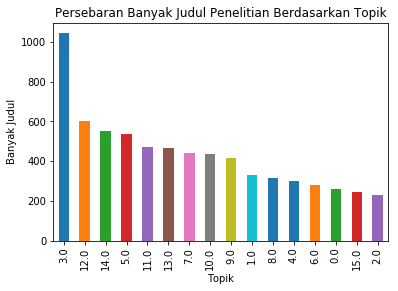

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9479,"cloud_computing, internet_banking, jadwal, studi_kasus, pengaruh_kualitas, sistem_informasi, inv...","[metode, fuzzy, time, series, cheng, memprediksi, jumlah, wisatawan, provinsi, sumatera, barat, ..."
1,1.0,0.9507,"sistem_informasi, rancang_bangun, framework_laravel, metodologi, metodologi_berorientasi, smp_ne...","[perancangan, sistem, informasi, web, php, mysql, smp, negeri, sibolga, sistem_informasi, php_my..."
2,2.0,0.9414,"dinas, dinas_pendidikan, kota_ternate, peserta_didik, keputusan_penerimaan, pembangunan_daerah, ...","[sistem, penilaian, ujian, kenaikan, tingkat, perguruan, pencak, silat, beladiri, tangan, kosong..."
3,3.0,0.9592,"sistem_informasi, studi_kasus, rancang_bangun, informasi, perancangan, implementasi_algoritma, s...","[rancang, bangun, sistem, informasi, pengumpulan, dana, panti, asuhan, metode, crowdfunding, mod..."
4,4.0,0.9449,"sma_negeri, web_service, siswa_sma, sekolah_menengah, bahasa_inggris, sistem_informasi, xyz, sek...","[sistem, pemantauan, informasi, akademik, siswa, sma, merdeka, oleh, wali, murid, web, informasi..."
5,5.0,0.9554,"rancang_bangun, sistem_informasi, aplikasi_mobile, metodologi_berorientasi, kinerja_karyawan, pr...","[perancangan, sistem, informasi, sirkulasi, berkas, notaris, studi, kasus, kantor, notaris, peja..."
6,6.0,0.9507,"pengolahan_data, smk_negeri, sistem_informasi, raspberry_pi, pariwisata, rekayasa_perangkat, ras...","[sistem, informasi, geografis, pemetaan, lokasi, bencana, alam, sumatera, utara, web, sistem_inf..."
7,7.0,0.9574,"sistem_informasi, metode_waterfall, studi_kasus, mata_kuliah, persamaan, rancang_bangun, sistem_...","[sistem, informasi, forum, diskusi, layanan, mandiri, online, warga, rw09, kelurahan, karadenan,..."
8,8.0,0.9507,"qr_code, sms_gateway, rancang_bangun, sekolah_dasar, pengamanan_data, basis_data, user_interface...","[keanekaragaman, fungi, mikoriza, arbuskula, fma, beberapa, jenis, pohon, kawasan, hutan, primer..."
9,9.0,0.9592,"e_commerce, sistem_informasi, metode_forward, sistem_pakar, diagnosa_penyakit, rekam_medis, comm...","[aplikasi, sistem, pakar, diagnosa, penyakit, hernia, metode, forward, chaining, backward, chain..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2019.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.148629  0.103249       1        1  9.168569
14     0.044960  0.062609       2        1  7.819308
12     0.095221  0.057175       3        1  7.603372
5     -0.094455  0.002978       4        1  7.169709
13     0.032560  0.068301       5        1  6.851652
11    -0.045281 -0.010819       6        1  6.695528
7     -0.063772  0.007295       7        1  6.514736
10    -0.057782 -0.161075       8        1  6.504164
9      0.032119  0.047418       9        1  6.224095
4      0.035242  0.003120      10        1  5.356144
8      0.015184 -0.041014      11        1  5.270460
0      0.008171 -0.022144      12        1  5.233615
1      0.000976  0.006008      13        1  5.211255
6      0.003698 -0.053170      14        1  4.952892
2      0.058256 -0.040159      15        1  4.738354
15     0.083532 -0.029772      16        1  4.686137, topic_info=   

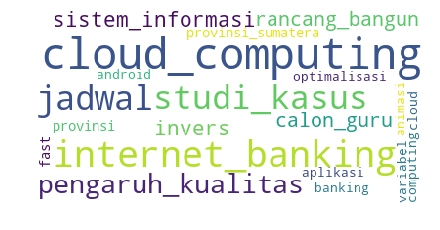

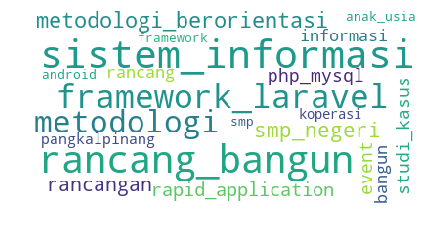

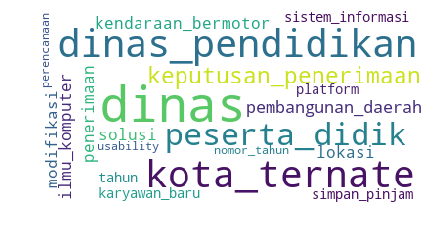

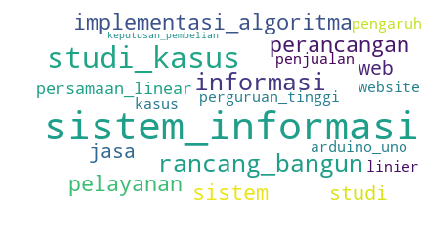

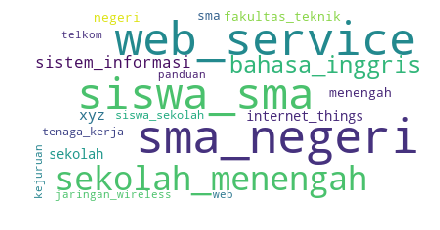

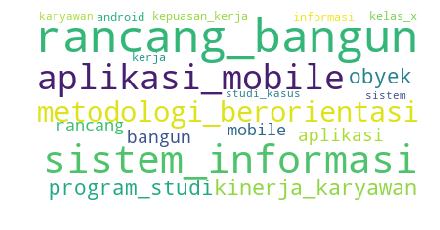

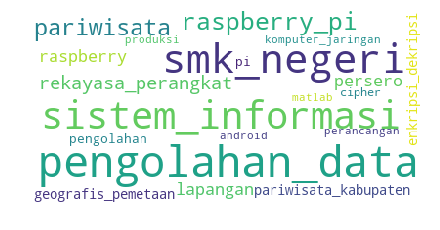

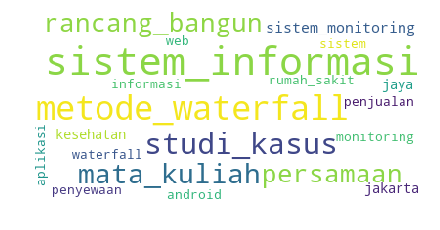

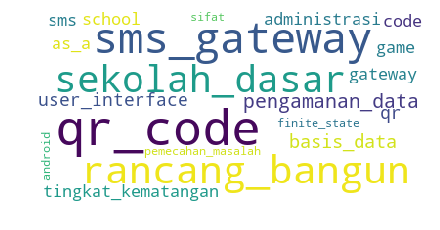

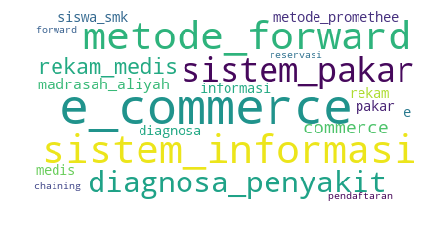

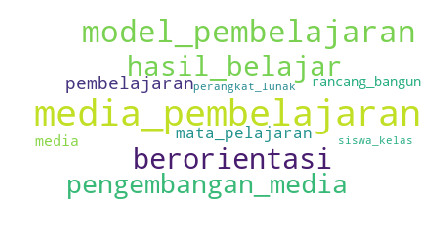

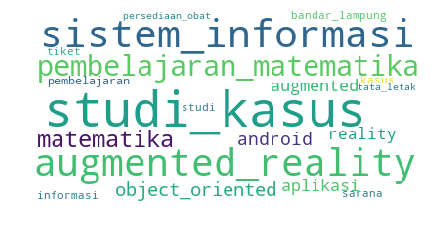

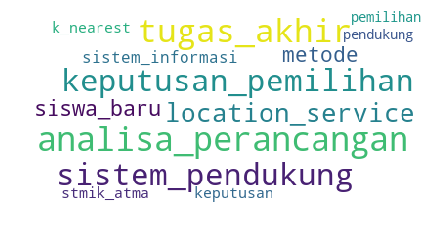

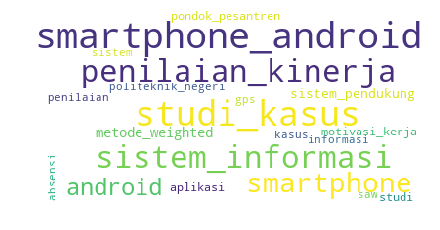

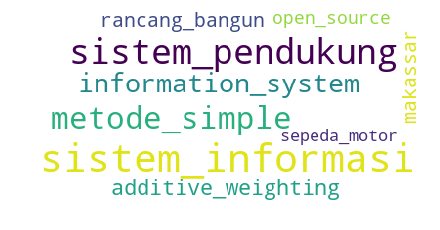

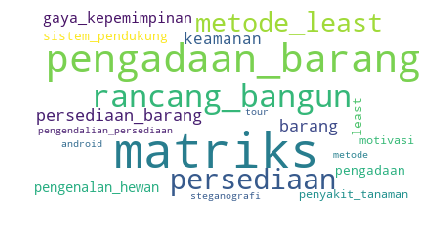

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2019.pkl'
pickle.dump(model, open(filename, 'wb'))


In [23]:
# menyimpan model LDA
model.save('lda.model')

# memuat model LDA
model =  models.LdaModel.load('lda.model')